#Считывание датасета

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Визуализация распределения значений

In [6]:
import matplotlib.pyplot as plt

##Выживаемость

In [65]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


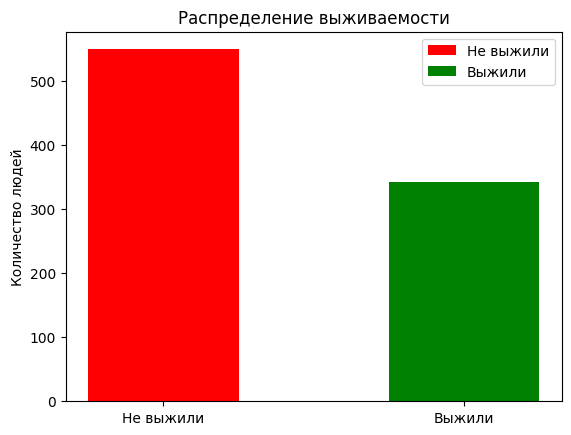

In [90]:
fig_1, ax_1 = plt.subplots()

bar_colors_1 = ['red', 'green']
bar_labels_1 = ['Не выжили', 'Выжили']

ax_1.bar(["Не выжили", "Выжили"], df['Survived'].value_counts(),
         width=0.5, color=bar_colors_1, label=bar_labels_1)

ax_1.set_ylabel('Количество людей')
plt.title('Распределение выживаемости')
plt.legend()
plt.show()

##Класс

In [9]:
df['Pclass'].unique()

array([3, 1, 2])

In [10]:
people_of_class = [
    df.loc[df['Pclass'] == 1].shape[0],
    df.loc[df['Pclass'] == 2].shape[0],
    df.loc[df['Pclass'] == 3].shape[0]]
classes = ["Первый класс", "Второй класс", "Третий класс"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

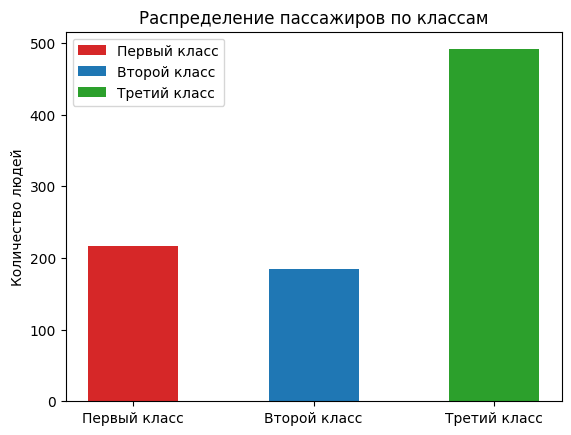

In [92]:
fig_2, ax_2 = plt.subplots()

ax_2.bar(classes, people_of_class, width=0.5,
         color=bar_colors, label=classes)

ax_2.set_ylabel('Количество людей')
plt.title('Распределение пассажиров по классам')
plt.legend()
plt.show()

##Возраст

In [12]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Введем категории для визуализации:
<br>Дети - меньше 18 лет - A
<br>Молодые люди - от 18 до 29 - B
<br>Средний возраст - от 30 до 49 - C
<br>Взрослые люди - от 50 до 64 - D
<br>Пожилые люди - 65 и больше - E
<br>Если данных нет - Z

In [18]:
df['Age_cat'] = 'Z'

In [23]:
df.loc[df['Age'] < 18, 'Age_cat'] = 'A'
df.loc[(df['Age'] >= 18) & (df['Age'] < 30), 'Age_cat'] = 'B'
df.loc[(df['Age'] >= 30) & (df['Age'] < 50), 'Age_cat'] = 'C'
df.loc[(df['Age'] >= 50) & (df['Age'] < 65), 'Age_cat'] = 'D'
df.loc[df['Age'] >= 65, 'Age_cat'] = 'E'

In [24]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C,A
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q,C
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,Z
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,C
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,C
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C,C
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q,Z
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S,A
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,C
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S,Z


In [29]:
df['Age_cat'].value_counts()

,count
Age_cat,
B,271
C,256
Z,177
A,113
D,63
E,11


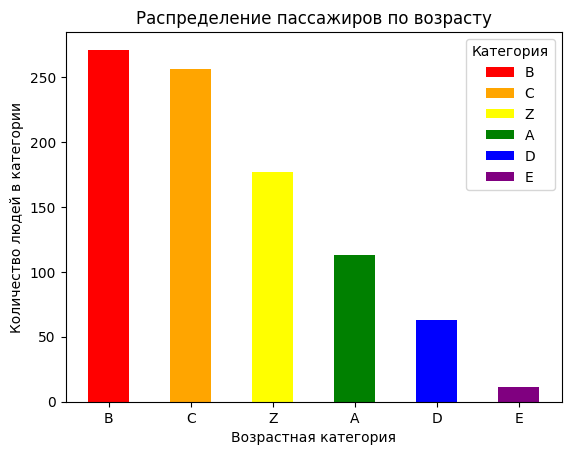

In [96]:
fig_3, ax_3 = plt.subplots()

bar_colors_3 = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

ax_3.bar(df['Age_cat'].value_counts().index, df['Age_cat'].value_counts(),
         width=0.5, color=bar_colors_3,
         label=df['Age_cat'].value_counts().index)

ax_3.set_ylabel('Количество людей в категории')
ax_3.set_xlabel('Возрастная категория')
plt.legend(title="Категория")
plt.title('Распределение пассажиров по возрасту')
plt.show()

##Пол

Для интереса сделаю piechart

In [46]:
sex_dist = [df['Sex'].value_counts()['male'], df['Sex'].value_counts()['female']]
sex_labels = ['Мужчины', "Женщины"]

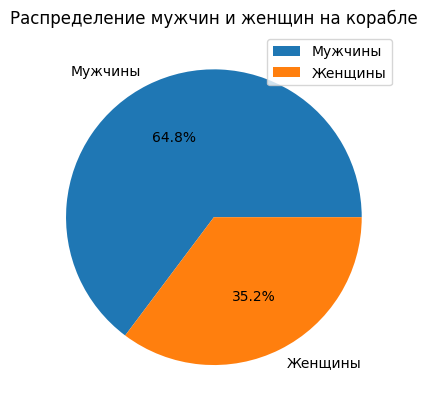

In [97]:
fig_4, ax_4 = plt.subplots()

ax_4.pie(sex_dist, labels=sex_labels, autopct='%1.1f%%')
plt.title("Распределение мужчин и женщин на корабле")
plt.legend()
plt.show()

##Распределение детей/родителей

In [48]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


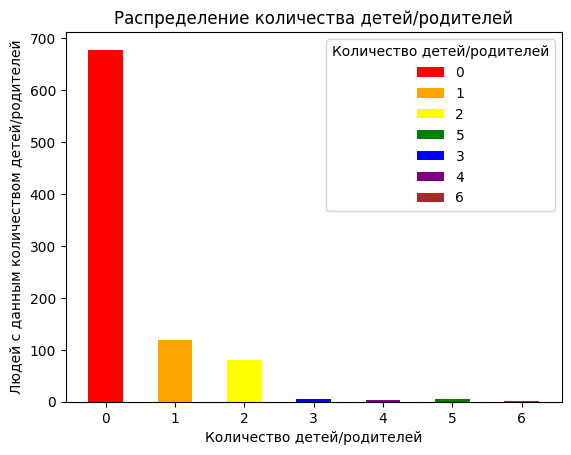

In [98]:
fig_5, ax_5 = plt.subplots()

bar_colors_5 = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown']

ax_5.bar(df['Parch'].value_counts().index, df['Parch'].value_counts(),
         width=0.5, color=bar_colors_5, label=df['Parch'].value_counts().index)

ax_5.set_ylabel('Людей с данным количеством детей/родителей')
ax_5.set_xlabel('Количество детей/родителей')
plt.legend(title="Количество детей/родителей")
plt.title('Распределение количества детей/родителей')
plt.show()

Надо ли как-то разделить, где дети, а где родители? Например, если пассажиру меньше 19, то для него дано количество родителей, если старше, то уже дети.

#boxplot для столбца Age

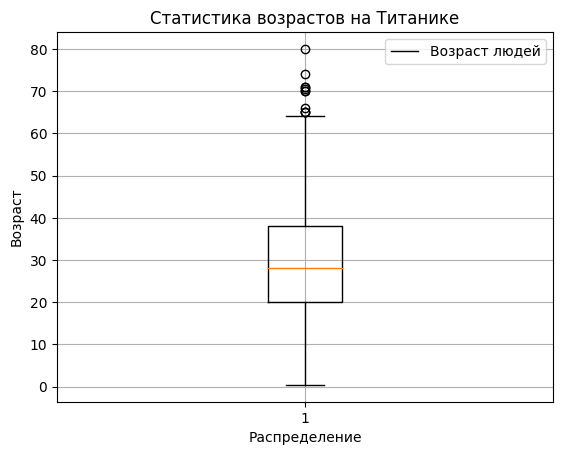

In [120]:
plt.boxplot(df['Age'].dropna())
plt.grid(True)
plt.title('Статистика возрастов на Титанике')
plt.ylabel('Возраст')
plt.xlabel('Распределение')
plt.legend(['Возраст людей'])
plt.show()

#Интерпретация графика

Из полученного графика типа boxplot можно сделать следующие выводы: средний возраст пассажиров на корабле чуть меньше 30 лет. При этом бОльшая часть пассажиров была в возрасте от 20 до почти 40 лет. Гораздо меньше людей в возрасте меньше 20 и выше 40. При этом пассажиров, возраст которых составлял почти 65+ лет, настолько мало, что данные о них считаются за выбросы.

#piechart для Survived и Pclass

In [62]:
surv = [df['Survived'].mean() * 100, (1 - df['Survived'].mean()) * 100]
labels = ['Выжили', 'Не выжили']

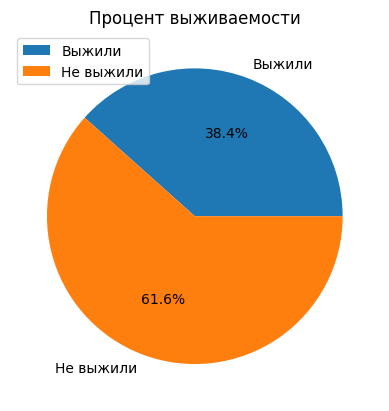

In [106]:
fig_6, ax_6 = plt.subplots()

ax_6.pie(surv, labels=labels, autopct='%1.1f%%')
plt.title("Процент выживаемости")
plt.legend(loc='upper left')
plt.show()

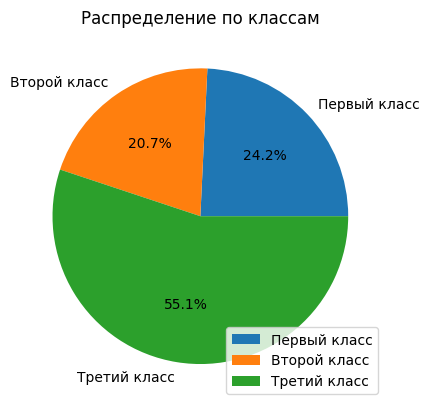

In [113]:
fig_7, ax_7 = plt.subplots()

ax_7.pie(people_of_class, labels=classes, autopct='%1.1f%%')
plt.title("Распределение по классам")
plt.legend(loc='lower right')
plt.show()

#pairplot

In [121]:
import seaborn as sns

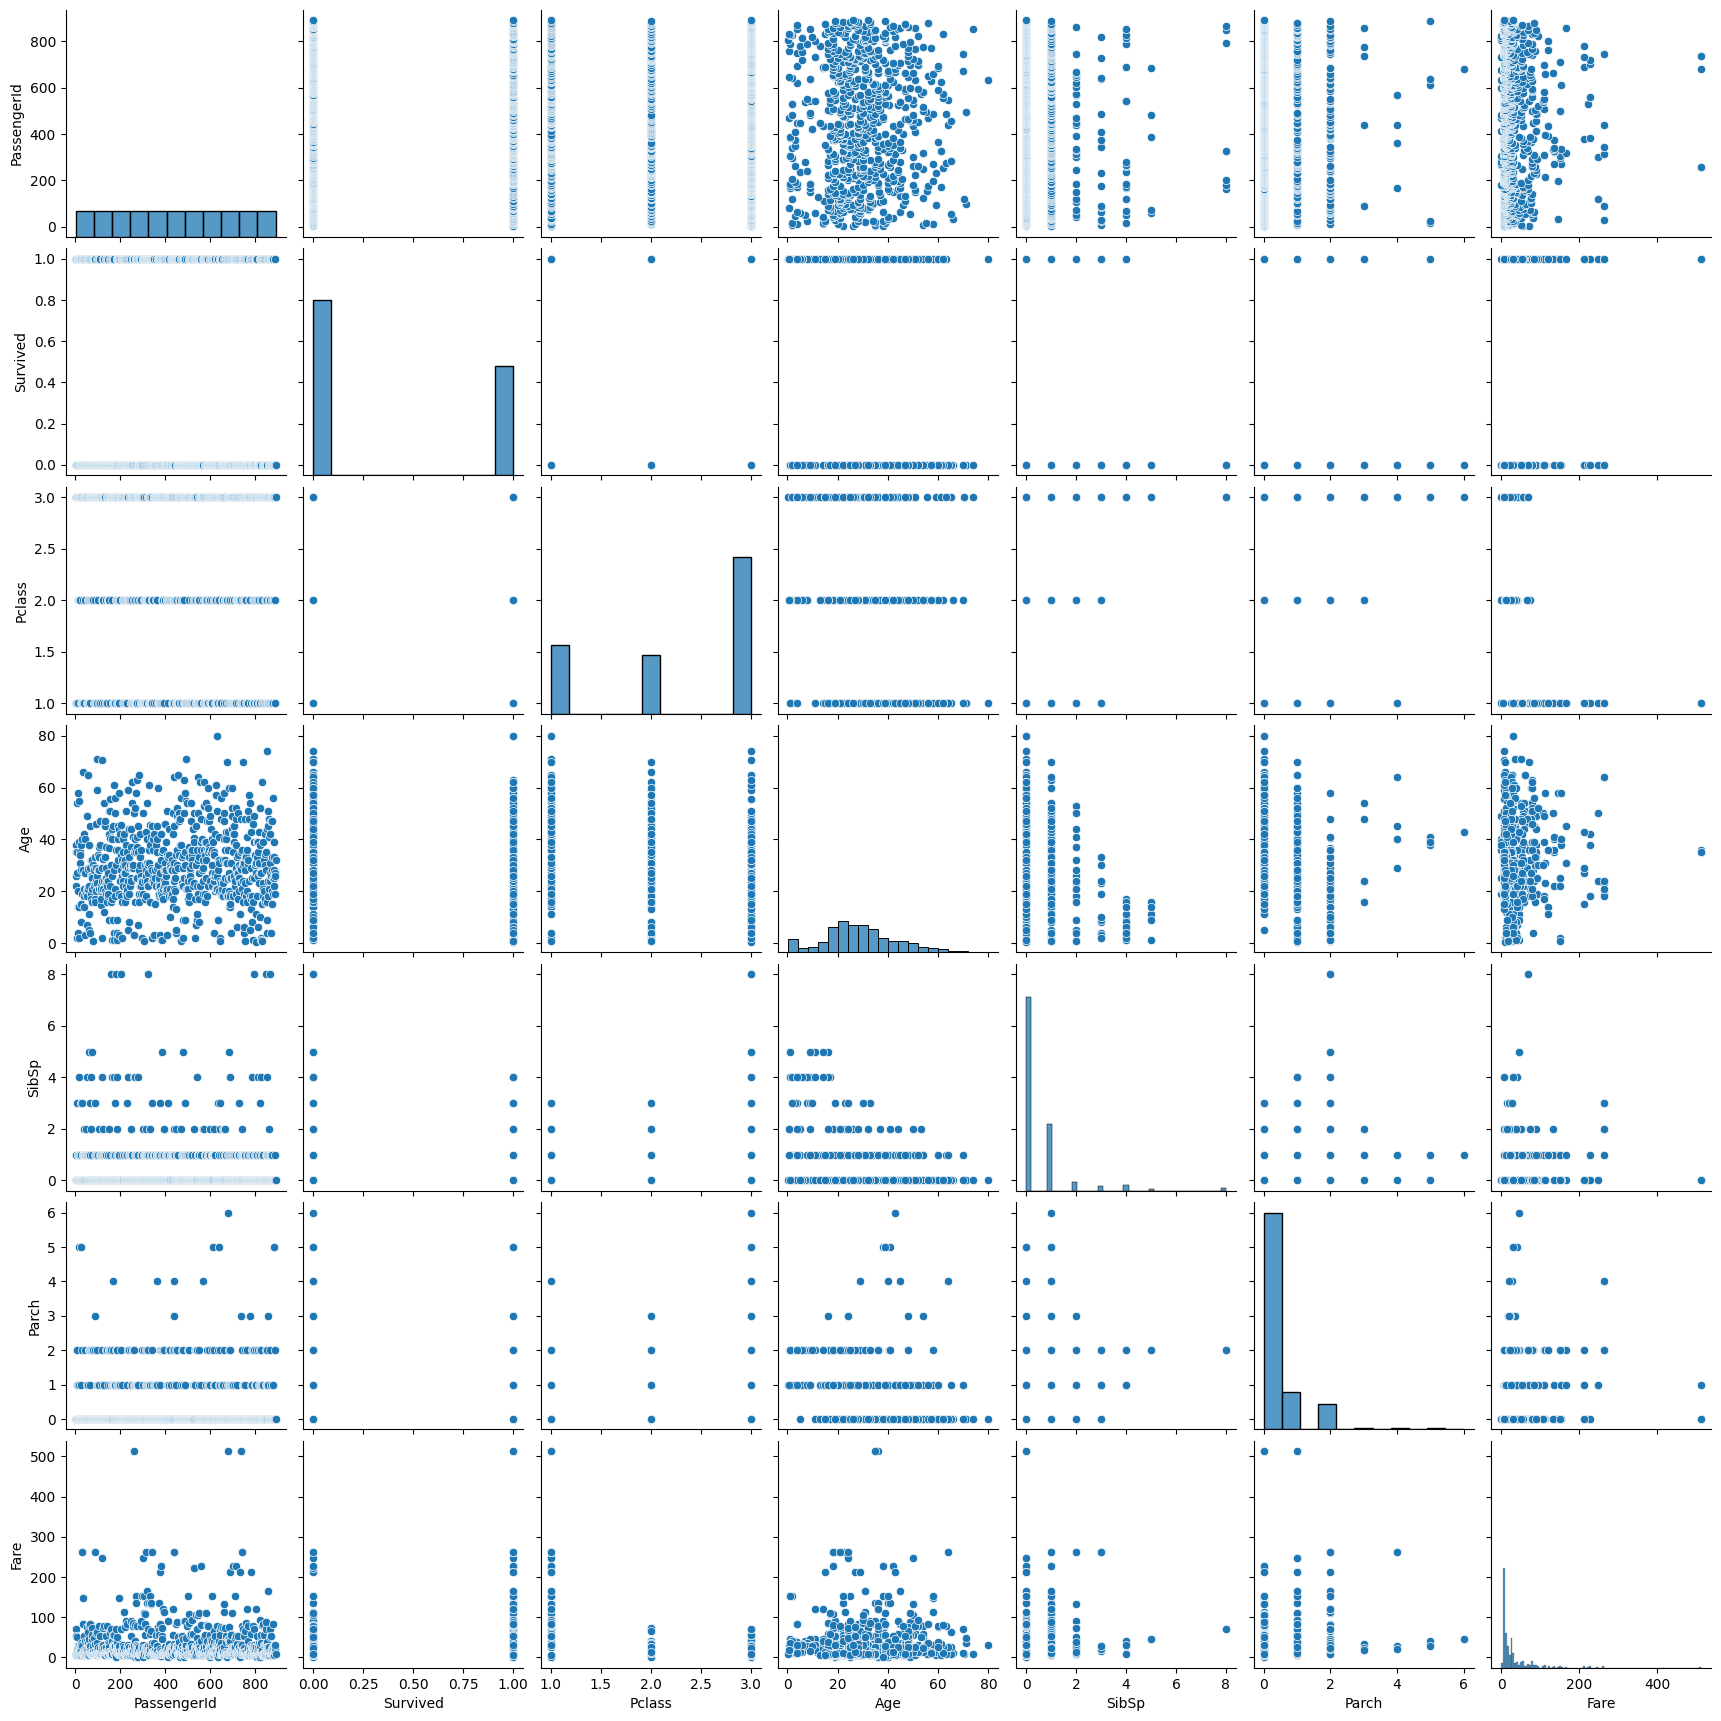

In [124]:
sns.pairplot(df)

#sunburst plot

In [125]:
import plotly.express as px

In [130]:
first_male = df.loc[(df['Pclass'] == 1) & (df['Sex'] == 'male')].shape[0]
first_female = df.loc[(df['Pclass'] == 1) & (df['Sex'] == 'female')].shape[0]
second_male = df.loc[(df['Pclass'] == 2) & (df['Sex'] == 'male')].shape[0]
second_female = df.loc[(df['Pclass'] == 2) & (df['Sex'] == 'female')].shape[0]
third_male = df.loc[(df['Pclass'] == 3) & (df['Sex'] == 'male')].shape[0]
third_female = df.loc[(df['Pclass'] == 3) & (df['Sex'] == 'female')].shape[0]

In [131]:
data = dict(
    categories = ['Total',
                  '1st', '2nd', '3rd',
                  'Male', 'Female',
                  'Male', 'Female',
                  'Male', 'Female',],
    parent = ['',
              'Total', 'Total', 'Total',
              '1st', '1st',
              '2nd', '2nd',
              '3rd', '3rd'],
    value = [df.shape[0], people_of_class[0], people_of_class[1],
             people_of_class[2],
             first_male, first_female, second_male, second_female,
             third_male, third_female]
)

fig = px.sunburst(data, names='categories', parents='parent', values='value',
                  branchvalues='total')
fig.show()